In [ ]:
#### Preamble ####
# Purpose: Explore some potential relationships among the variables of the dataset
# Author: Jiazhou(Justin) Bi and Weiyang Li
# Date: 7 October 2024
# Contact: justin.bi@mail.utoronto.ca or weiyang.li@mail.utoronto.ca
# License: MIT
# Pre-requisites: see requirements.txt
# Any other information needed? None

# Loading the Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_parquet('../data/02-analysis_data/cleaned_data.parquet')
df.head()

,STATEICP,GQ,MORTGAGE,SEX,AGE,MARST,EDUC,SCHLTYPE,OCC2010,IND1990,INCTOT,VETSTAT,EDUC_new
0,41,1,3,2,51,6,10,1,800,850,120000,1,4
1,41,1,3,1,61,1,8,1,4810,711,200000,1,4
2,41,1,1,1,63,1,7,1,8030,50,40000,1,4
3,41,1,1,2,36,4,7,1,120,702,50000,1,4
4,41,1,1,1,17,6,5,3,4000,641,400,1,3


# Total Income Distribution

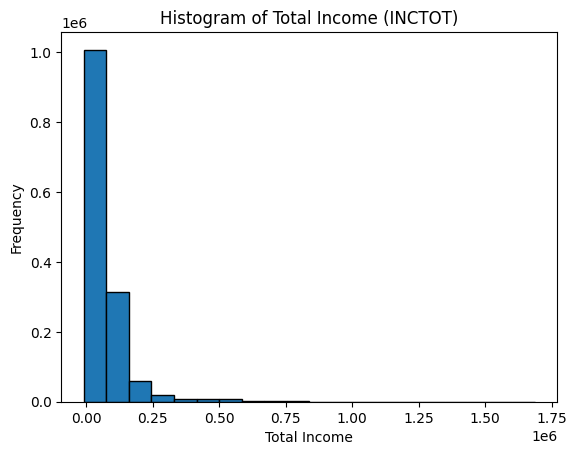

In [4]:
plt.hist(df['INCTOT'], bins=20, edgecolor='black')
plt.xlabel('Total Income')
plt.ylabel('Frequency')
plt.title('Histogram of Total Income (INCTOT)')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd314958b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd3149700d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd319810fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd314970610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3149708b0>],
 'means': []}

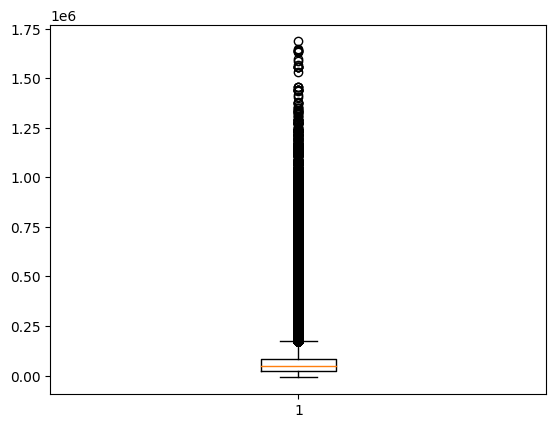

In [5]:
plt.boxplot(df['INCTOT'])

In [6]:
upper_outliers_INCTOT = df[df['INCTOT'] >= 1000000]
upper_outliers_INCTOT

,STATEICP,GQ,MORTGAGE,SEX,AGE,MARST,EDUC,SCHLTYPE,OCC2010,IND1990,INCTOT,VETSTAT,EDUC_new,MORTGAGE_LABEL
19131,41,1,1,1,71,1,10,1,10,141,1084000,1,4,Fully Owned
30056,61,1,1,1,73,1,11,1,120,511,1071000,1,5,Fully Owned
40271,61,1,3,1,77,1,11,1,3060,831,1167800,2,5,Mortgage/Trust Deed
43420,61,1,3,1,54,1,10,1,4920,712,1033000,1,4,Mortgage/Trust Deed
46400,61,1,3,1,57,4,11,1,1360,882,1033000,1,5,Mortgage/Trust Deed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388750,73,1,1,1,67,1,8,1,10,502,1030500,1,4,Fully Owned
1389757,73,1,3,1,43,1,11,1,3060,850,1018000,1,5,Mortgage/Trust Deed
1390068,73,1,3,1,71,1,11,1,20,362,1077600,1,5,Mortgage/Trust Deed
1390905,73,1,3,1,52,1,10,1,430,732,1018000,1,4,Mortgage/Trust Deed


In [7]:
mean_INCTOT = df['INCTOT'].mean()
mean_INCTOT

68730.31508204486

# Boxplot: mortgage vs income

/var/folders/jq/fpbn8rh944ngq3h_rklxn8_00000gn/T/ipykernel_33423/2222064529.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MORTGAGE_LABEL', y='INCTOT', data=df, palette='pastel', edgecolor='black')


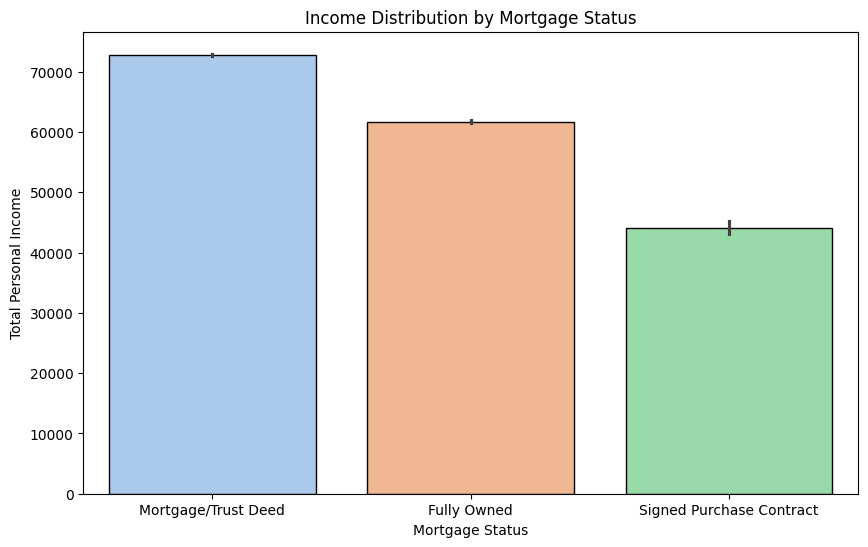

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapping the mortgage status codes to descriptive labels
mortgage_labels = {
    1: 'Fully Owned',
    2: 'Other (Possibly Yes)',
    3: 'Mortgage/Trust Deed',
    4: 'Signed Purchase Contract'
}

df['MORTGAGE'] = df['MORTGAGE'].astype('int')
# Replace the mortgage codes with descriptive labels in a new column
df['MORTGAGE_LABEL'] = df['MORTGAGE'].map(mortgage_labels)
df['MORTGAGE'] = df['MORTGAGE'].astype('string')

# Boxplot for Income by Mortgage Status with descriptive x-axis labels
plt.figure(figsize=(10,6))
sns.barplot(x='MORTGAGE_LABEL', y='INCTOT', data=df, palette='pastel', edgecolor='black')
plt.title('Income Distribution by Mortgage Status')
plt.xlabel('Mortgage Status')
plt.ylabel('Total Personal Income')
plt.show()

# Correlation Analysis

/var/folders/t5/gyj8_sg550l1gf1spp2kxjwm0000gn/T/ipykernel_58459/2066334469.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[vars].corr()


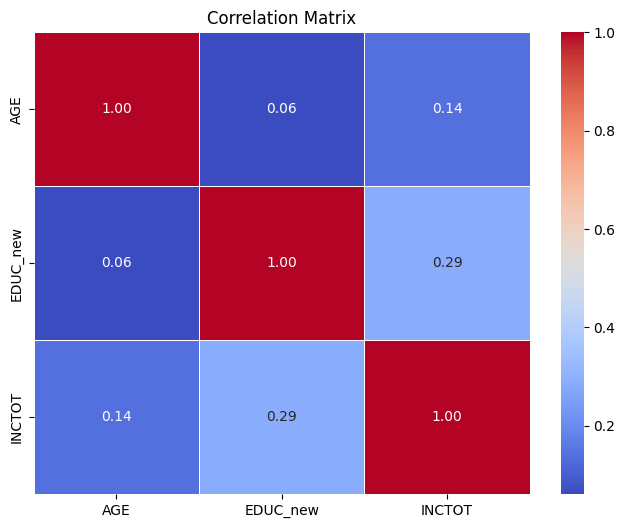

In [9]:
# Select variables
# Note: Since 'OWNERSHP' only contain='1' after filting, not included it in matrix
vars = ["STATEICP", "MORTGAGE","GQ","SEX","AGE","MARST","EDUC_new","SCHLTYPE","OCC2010","VETSTAT","IND1990","INCTOT"]

# Compute correlation matrix
correlation_matrix = df[vars].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Interaction Analysis: Education and Sex on Income

/var/folders/jq/fpbn8rh944ngq3h_rklxn8_00000gn/T/ipykernel_33423/3239121485.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='EDUC', y='INCTOT', hue='SEX', data=df, ci='sd')  # ci='sd' adds standard deviation error bars


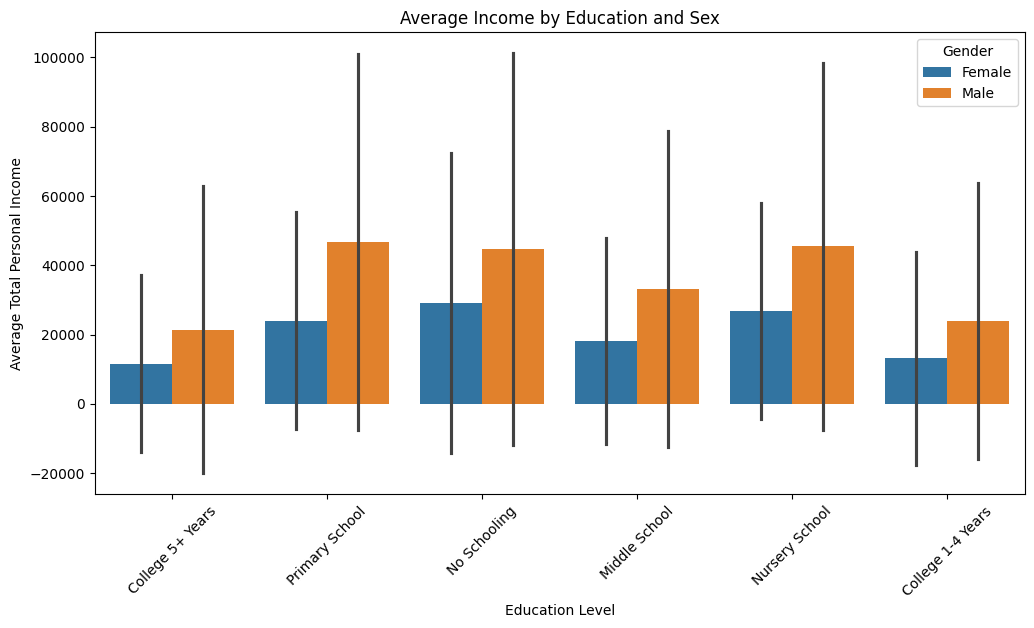

In [9]:
# Note: Gender may influence how education affects income. There are often gender wage gaps, even at similar education levels.

# Mapping the mortgage status codes to descriptive labels
educ_labels = {
    0: 'No Schooling',
    1: 'Nursery School',
    2: 'Primary School',
    3: 'Middle School',
    4: 'College 1-4 Years',
    5: 'College 5+ Years'
}

# Mapping the SEX variable to more descriptive labels
sex_labels = {1: 'Male', 2: 'Female'}

df['SEX'] = df['SEX'].astype('int')
df['EDUC'] = df['EDUC'].astype('int')
# Replace the mortgage codes with descriptive labels in a new column
df['SEX'] = df['SEX'].map(sex_labels).astype('string')
df['EDUC'] = df['EDUC'].map(educ_labels).astype('string')




plt.figure(figsize=(12, 6))
sns.barplot(x='EDUC', y='INCTOT', hue='SEX', data=df, ci='sd')  # ci='sd' adds standard deviation error bars
plt.title('Average Income by Education and Sex')
plt.xlabel('Education Level')
plt.ylabel('Average Total Personal Income')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are too long
plt.show()